## Descriptive Statistics and Validation

v1_08.04.2024

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.stats import ttest_rel, ttest_ind
from scipy.stats import wilcoxon
from scipy.stats import zscore

### Descriptive Statistics

In [42]:
# Load the data
data = pd.read_csv('data_merged_all.csv')

In [3]:
# Basic Descriptive Statistics for all the variables
descriptive_stats = data.describe(include='all')
print("Descriptive Statistics:\n", descriptive_stats)
#plt.show()

In [18]:
# Distribution of gender
gender_distribution = data[['Gender_Männlich', 'Gender_Weiblich']].sum()
print("\nGender Distribution:\n", gender_distribution)


Gender Distribution:
 Gender_Männlich    22
Gender_Weiblich     8
dtype: int64


In [19]:
# Counting education levels
education_levels = data[['Edu_Abitur_oder_Fachabitur', 'Edu_Bachelor', 'Edu_Master']].sum()
print("\nEducation Levels:\n", education_levels)


Education Levels:
 Edu_Abitur_oder_Fachabitur    10
Edu_Bachelor                  14
Edu_Master                     5
dtype: int64


In [20]:
# Distribution for the groups
group_order_distribution = data['Group_Nr'].value_counts()
print("\nGroup Order Distribution:\n", group_order_distribution)
#plt.show()


Group Order Distribution:
 2    7
4    6
3    4
5    4
1    3
7    3
6    2
8    1
Name: Group_Nr, dtype: int64


In [42]:
# Distribution for the Experimental conditions
experimental_distribution = data['Prompt_Support'].value_counts()
print("\nExperimental Conditions Distribution:\n",experimental_distribution)

In [21]:
# Big Five Personality Traits Distribution
big_five_distribution = data[['NEO[E]', 'NEO[A]', 'NEO[C]', 'NEO[N]', 'NEO[O]']].mean()
print("\nBig Five Personality Traits Distribution:\n", big_five_distribution)
#plt.show()

KeyError: "None of [Index(['NEO[E]', 'NEO[A]', 'NEO[C]', 'NEO[N]', 'NEO[O]'], dtype='object')] are in the [columns]"

In [ ]:
# Calculate mean time for each "Prompt_Support" group
mean_time_with_support = data[data['Prompt_Support'] == 1]['time_total'].mean()
mean_time_without_support = data[data['Prompt_Support'] == 0]['time_total'].mean()
print(f"Mean Time with Prompt Support: {mean_time_with_support}")
print(f"Mean Time without Prompt Support: {mean_time_without_support}")

In [ ]:
# Histograms for Distribution of Age and Work
plt.figure(figsize=(10, 5))
sns.histplot(data['AGE'], bins=10, kde=True)
plt.title('Age Distribution')

plt.figure(figsize=(10, 5))
sns.histplot(data['WORK'], bins=10, kde=True)
plt.title('Work Distribution')

Text(0.5, 1.0, 'Boxplot of Continuous Variables')

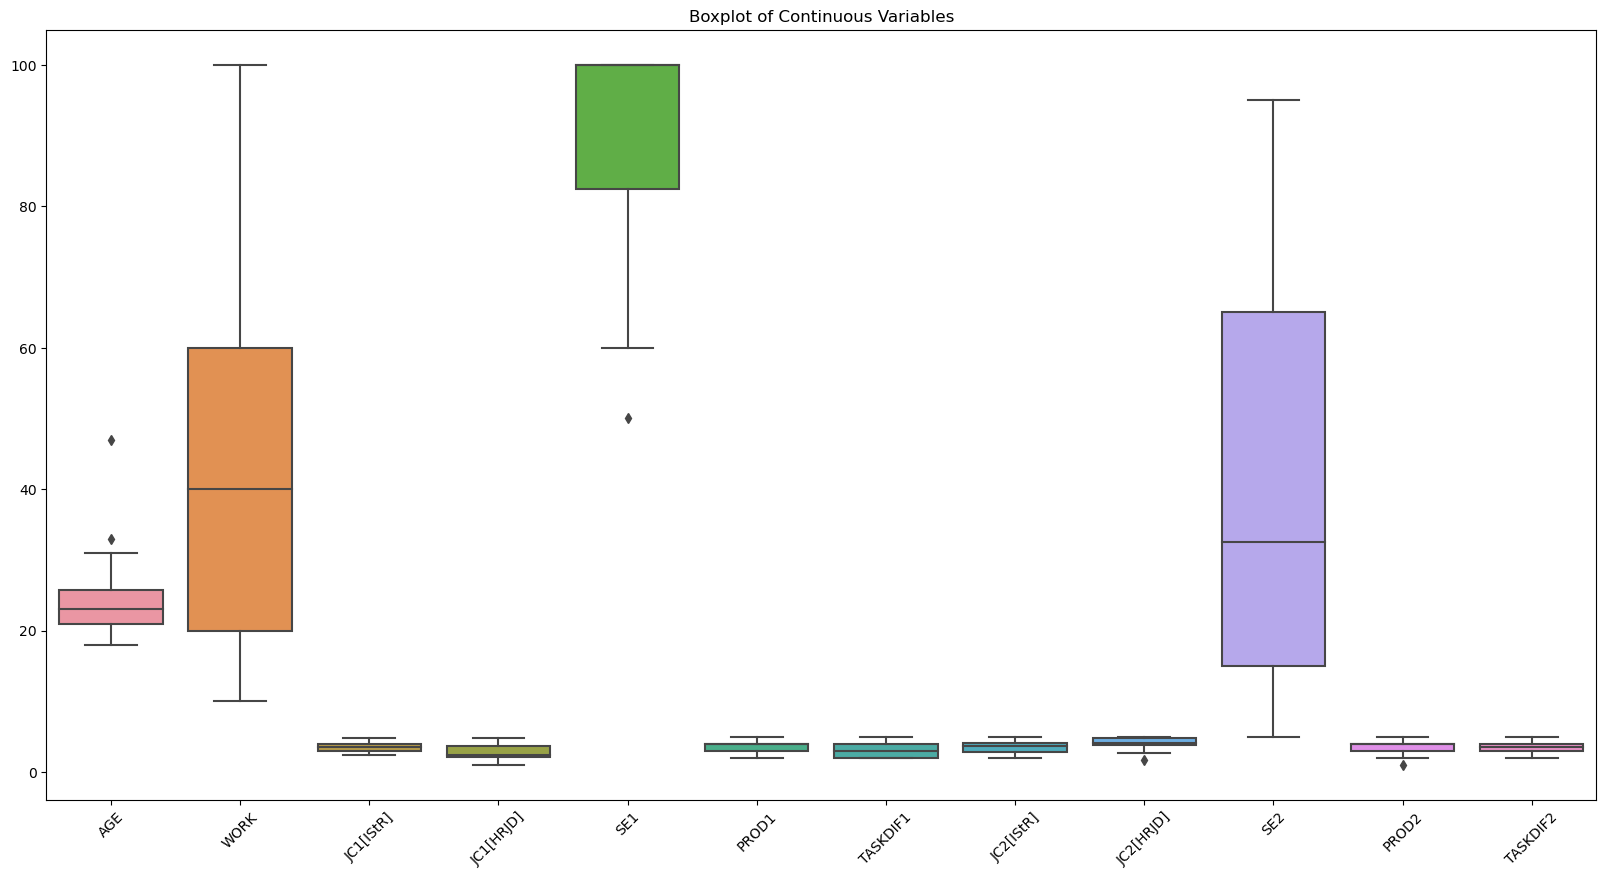

In [7]:
# Boxplots for Continuous Variables to check for outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[['JC1[IStR]', 'JC2[IStR]', 'JC1[HRJD]', 'JC2[HRJD]', 'SDT1[AUT]', 'SDT2[AUT]', 'SDT1[COM]', 'SDT2[COM]']])
plt.xticks(rotation=45)
plt.title('Boxplot of Continuous Variables')

In [ ]:
# Boxplots for Continuous Variables to check for outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[['PROD1', 'PROD2', 'TASKDIF1', 'TASKDIF2']])
plt.xticks(rotation=45)
plt.title('Boxplot of Continuous Variables')

In [ ]:
# Boxplots for Continuous Variables to check for outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[['SE1', 'SE2', ]])
plt.xticks(rotation=45)
plt.title('Boxplot of Continuous Variables')

Text(0.5, 1.0, 'Correlation Heatmap')

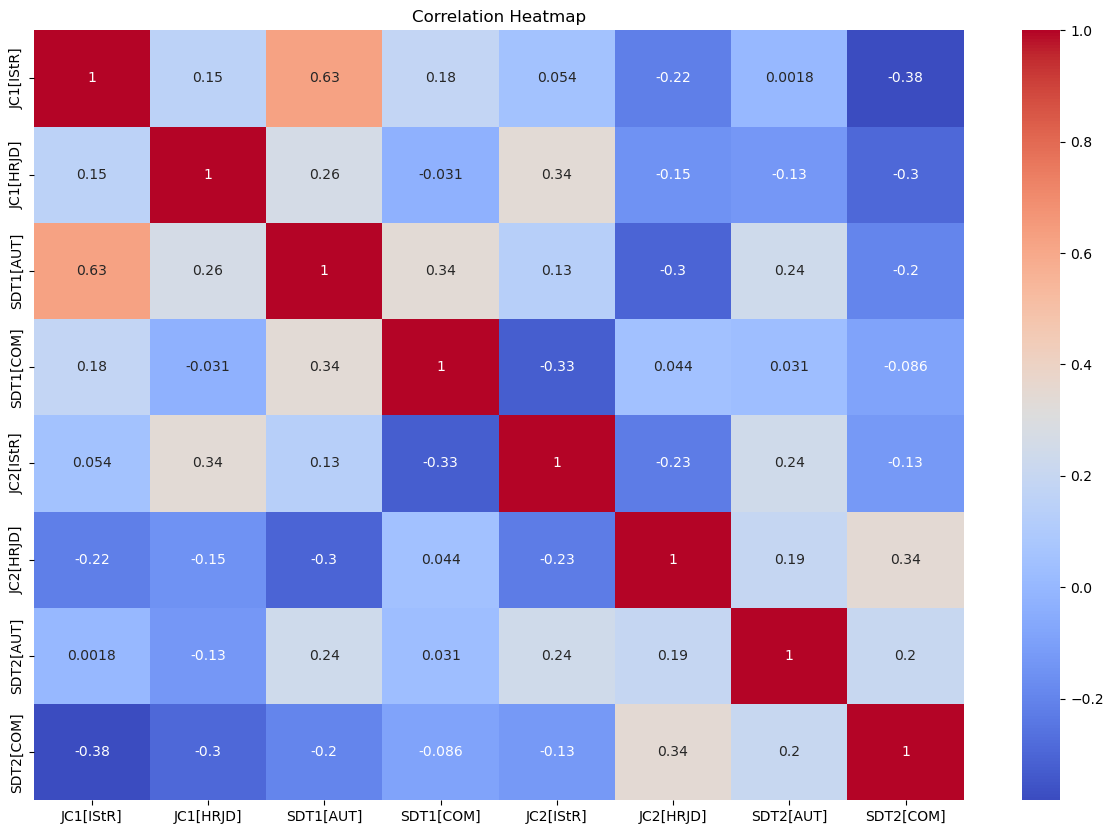

In [33]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = data=data[['JC1[IStR]', 'JC1[HRJD]', 'SDT1[AUT]', 'SDT1[COM]', 'JC2[IStR]', 'JC2[HRJD]', 'SDT2[AUT]', 'SDT2[COM]']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = data=data[['NEO[E]', 'NEO[A]', 'NEO[C]', 'NEO[N]', 'NEO[O]']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0.5, 1.02, 'Pairwise Correlations among Big Five Personality Traits')

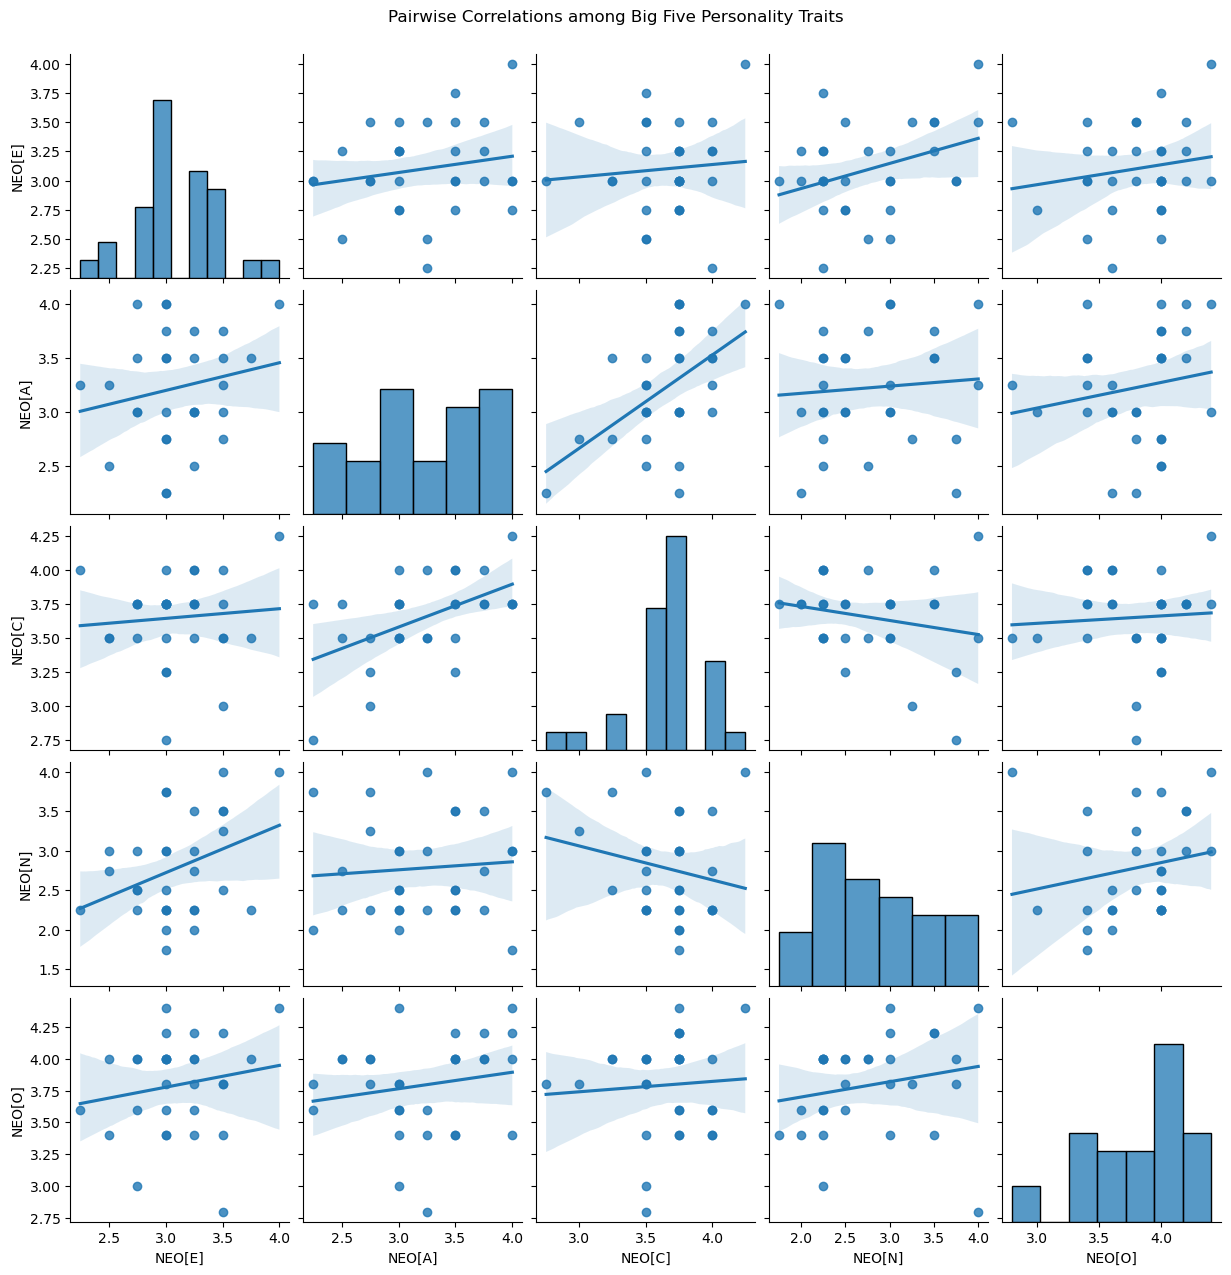

In [31]:
# Pairwise Correlation Plot for Big Five Personality Traits
sns.pairplot(data[['NEO[E]', 'NEO[A]', 'NEO[C]', 'NEO[N]', 'NEO[O]']], kind='reg')
plt.suptitle('Pairwise Correlations among Big Five Personality Traits', y=1.02)

Text(0.5, 1.02, 'Pairwise Correlations among Big Five Personality Traits')

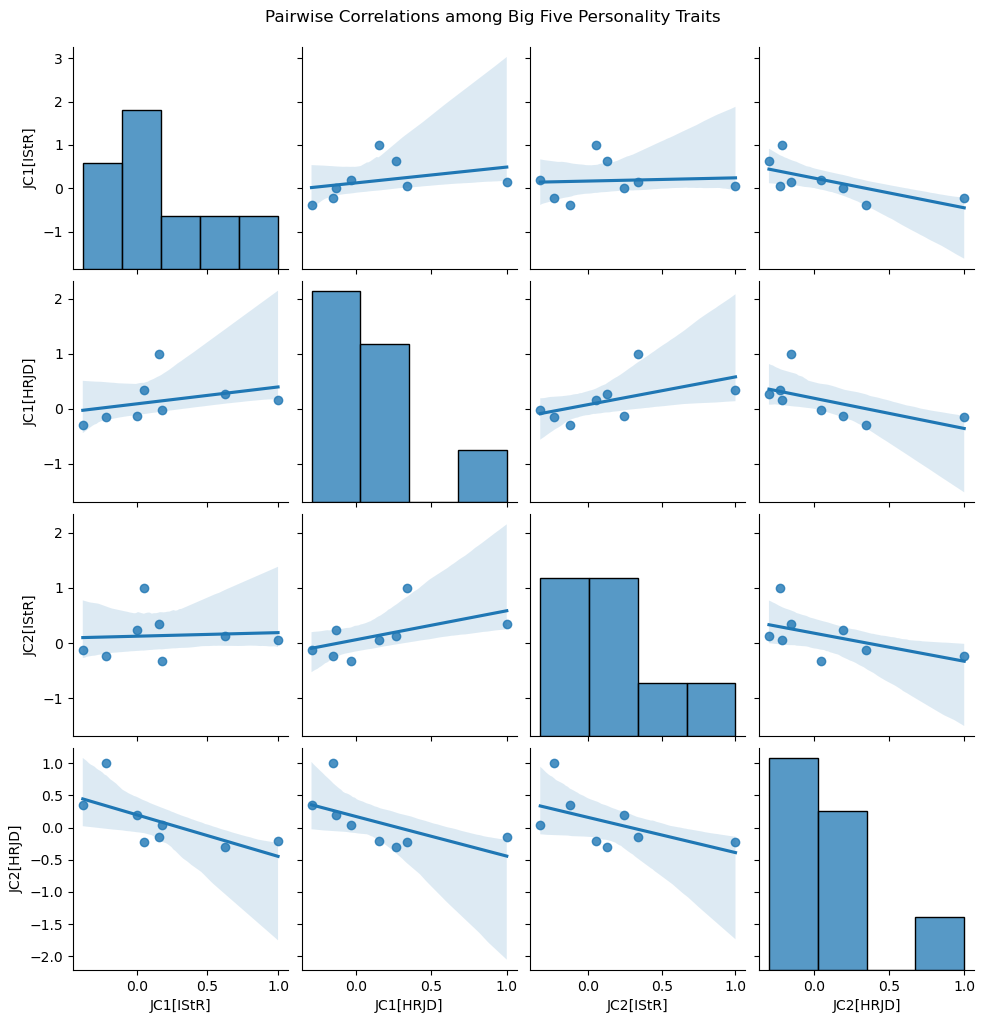

In [34]:
# Pairwise Correlation Plot for Big Five Personality Traits
sns.pairplot(data[['JC1[IStR]', 'JC1[HRJD]', 'JC2[IStR]', 'JC2[HRJD]']], kind='reg')
plt.suptitle('Pairwise Correlations among Big Five Personality Traits', y=1.02)

Text(0.5, 1.02, 'Pairwise Correlations among Big Five Personality Traits')

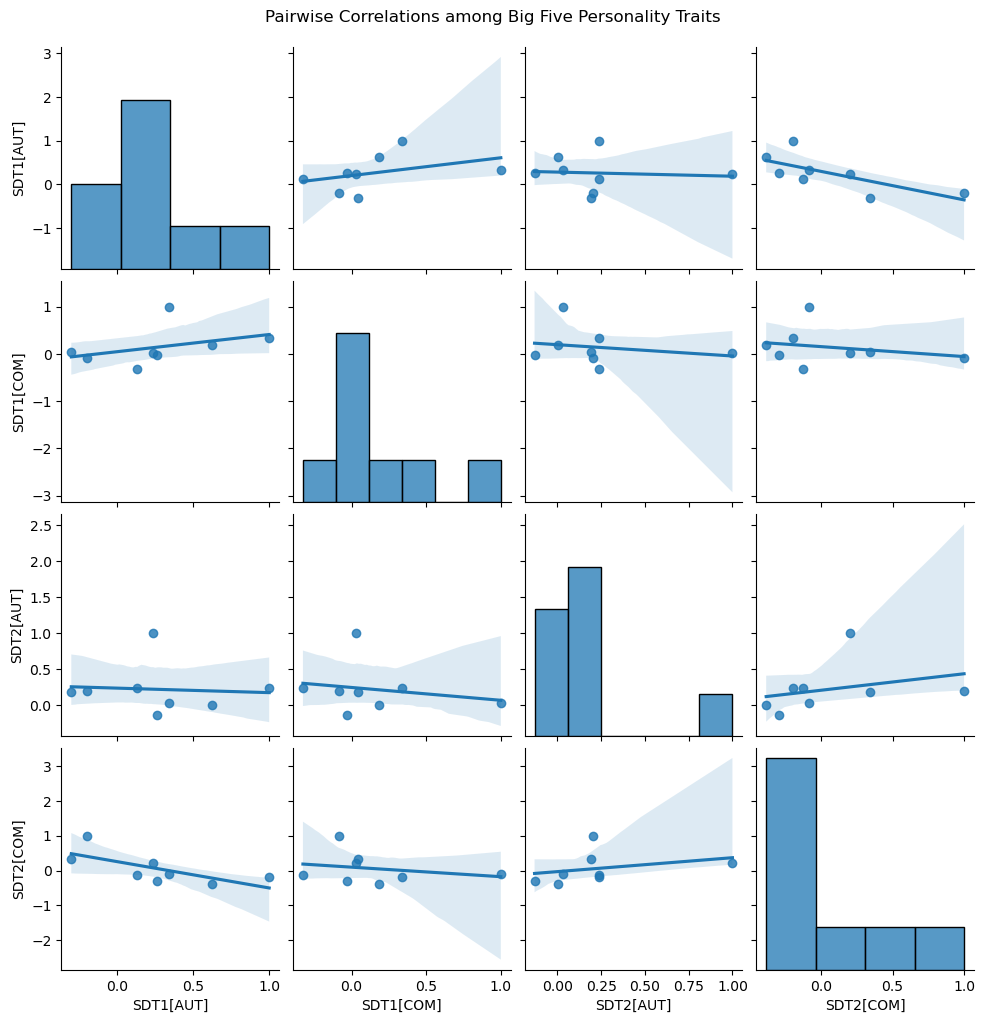

In [35]:
# Pairwise Correlation Plot for Big Five Personality Traits
sns.pairplot(data[['SDT1[AUT]', 'SDT1[COM]', 'SDT2[AUT]', 'SDT2[COM]']], kind='reg')
plt.suptitle('Pairwise Correlations among Big Five Personality Traits', y=1.02)

In [43]:
# Shapiro-Wilk test
print("Shapiro-Wilk Test for Normality:")
for column in ['JC1[IStR]', 'JC1[HRJD]', 'JC2[IStR]', 'JC2[HRJD]', 'SDT1[AUT]', 'SDT1[COM]', 'SDT2[AUT]', 'SDT2[COM]']:
    stat, p = stats.shapiro(data[column])
    print(f'{column}: Statistics={stat:.3f}, p={p:.3f}')

Shapiro-Wilk Test for Normality:
JC1[IStR]: Statistics=0.964, p=0.383
JC1[HRJD]: Statistics=0.935, p=0.069
JC2[IStR]: Statistics=0.970, p=0.528
JC2[HRJD]: Statistics=0.889, p=0.005
SDT1[AUT]: Statistics=0.873, p=0.002
SDT1[COM]: Statistics=0.847, p=0.001
SDT2[AUT]: Statistics=0.875, p=0.002
SDT2[COM]: Statistics=0.797, p=0.000


In [ ]:
# Assuming df is your DataFrame after loading your data
columns_of_interest = ['JC1[IStR]', 'JC1[HRJD]', 'JC2[IStR]', 'JC2[HRJD]', 'SDT1[AUT]', 'SDT1[COM]', 'SDT2[AUT]', 'SDT2[COM]']

# Calculating Skewness and Kurtosis for the selected columns
skewness = data[columns_of_interest].skew()
kurtosis = data[columns_of_interest].kurtosis()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

# Shapiro-Wilk Normality Test for each of the selected columns
for column in columns_of_interest:
    stat, p = stats.shapiro(data[column].dropna())
    print(f"\nShapiro-Wilk Test for {column}:\nStatistic: {stat:.3f}, p-Value: {p:.3f}")

In [ ]:
# Calculate skewness and kurtosis for continuous variables
skewness = data[['JC1[IStR]', 'JC1[HRJD]', 'SE1', 'PROD1', 'TASKDIF1', 'JC2[IStR]', 'JC2[HRJD]', 'SE2', 'PROD2', 'TASKDIF2']].apply(skew)
kurtosis_values = data[['JC1[IStR]', 'JC1[HRJD]', 'SE1', 'PROD1', 'TASKDIF1', 'JC2[IStR]', 'JC2[HRJD]', 'SE2', 'PROD2', 'TASKDIF2']].apply(kurtosis)

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis_values)

#plt.show()

### Differences in Group

In [37]:
# Load the data
data = pd.read_csv('data_merged_all.csv')

In [63]:
# Paired t-tests for within-subject comparisons (control vs. experimental)
paired_tests = {
    'Job Crafting Increasing Structural Job Ressources': ['JC1[IStR]', 'JC2[IStR]'],
    'Job Crafting Decreasing Hindering Job Demands': ['JC1[HRJD]', 'JC2[HRJD]'],
    'Self-Determination Autonomy': ['SDT1[AUT]', 'SDT2[AUT]'],
    'Self-Determination Competence': ['SDT1[COM]', 'SDT2[COM]'],
    'Self-Efficacy': ['SE1', 'SE2'],
    'Productivity': ['PROD1', 'PROD2'],
    'Task Difficulty': ['TASKDIF1', 'TASKDIF2']
}

for test, (control, experimental) in paired_tests.items():
    stat, p = ttest_rel(data[control], data[experimental])
    print(f"{test} Control vs. Experimental: t={stat:.3f}, p={p:.3f}")

Job Crafting Increasing Structural Job Ressources Control vs. Experimental: t=-0.259, p=0.797
Job Crafting Decreasing Hindering Job Demands Control vs. Experimental: t=-5.417, p=0.000
Self-Determination Autonomy Control vs. Experimental: t=1.188, p=0.245
Self-Determination Competence Control vs. Experimental: t=-3.102, p=0.004
Self-Efficacy Control vs. Experimental: t=7.186, p=0.000
Productivity Control vs. Experimental: t=-0.392, p=0.698
Task Difficulty Control vs. Experimental: t=-2.475, p=0.019


In [49]:
# For between-subject comparisons based on "Prompt_Support", 
# we'll need to split the dataset based on the binary condition
data_with_support = data[data['Prompt_Support'] == 1]
data_without_support = data[data['Prompt_Support'] == 0]

# Independent t-tests for between-subjects (with vs. without prompt support in experimental conditions)
independent_tests = {
    'Job Crafting Increasing Structural Job Ressources': 'JC2[IStR]',
    'Job Crafting Decreasing Hindering Job Demands': 'JC2[HRJD]',
    'Self-Determination Autonomy': 'SDT2[AUT]',
    'Self-Determination Competence': 'SDT2[COM]',
    'Self-Efficacy': 'SE2',
    'Productivity': 'PROD2',
    'Task Difficulty': 'TASKDIF2'
}

for test, column in independent_tests.items():
    stat, p = ttest_ind(data_with_support[column], data_without_support[column])
    print(f"{test} With vs. Without Prompt Support: t={stat:.3f}, p={p:.3f}")

In [36]:
# Function to remove outliers based on Z-score
def remove_outliers(data, column_list):
    for column in column_list:
        data[column] = data[column].astype(float)  # Ensure the data is float
        z_scores = stats.zscore(data[column])
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores < 3)  # Keeping only rows with a Z-score < 3
        data = data[filtered_entries]
    return data

# Columns to check for outliers
columns_to_check = ['JC1[IStR]', 'JC2[IStR]', 'JC1[HRJD]', 'JC2[HRJD]', 'SDT1[AUT]', 'SDT2[AUT]', 'SDT1[COM]', 'SDT2[COM]']

# Remove outliers
data_clean = remove_outliers(data, columns_to_check)

In [13]:
# Paired t-tests for within-subject comparisons (control vs. experimental) for data withouth outliers
paired_tests = {
    'Job Crafting Increasing Structural Job Ressources': ['JC1[IStR]', 'JC2[IStR]'],
    'Job Crafting Decreasing Hindering Job Demands': ['JC1[HRJD]', 'JC2[HRJD]'],
    'Self-Determination Autonomy': ['SDT1[AUT]', 'SDT2[AUT]'],
    'Self-Determination Competence': ['SDT1[COM]', 'SDT2[COM]']
}

for test, (control, experimental) in paired_tests.items():
    stat, p = ttest_rel(data_clean[control], data_clean[experimental])
    print(f"{test} Control vs. Experimental: t={stat:.3f}, p={p:.3f}")

Job Crafting Increasing Structural Job Ressources Control vs. Experimental: t=-0.337, p=0.738
Job Crafting Decreasing Hindering Job Demands Control vs. Experimental: t=-6.634, p=0.000


In [16]:
# Compare job crafting constructs between conditions using Wilcoxon signed-rank test to improve robustness
test_pairs = [('JC1[IStR]', 'JC2[IStR]'), ('JC1[HRJD]', 'JC2[HRJD]'), ('SDT1[AUT]', 'SDT2[AUT]'), ('SDT1[COM]', 'SDT2[COM]')]

for pair in test_pairs:
    stat, p = wilcoxon(data[pair[0]], data[pair[1]])
    print(f"Wilcoxon test for {pair[0]} vs. {pair[1]}: Stat={stat:.3f}, p={p:.5f}")


Wilcoxon test for JC1[IStR] vs. JC2[IStR]: Stat=192.500, p=0.81093
Wilcoxon test for JC1[HRJD] vs. JC2[HRJD]: Stat=31.000, p=0.00015


c:\Users\franc\anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [55]:
# CHECK IF SAME RESULTS AND THEN DELETE
# List of variables for within-subject comparisons
variables = ['JC1[IStR]', 'JC2[IStR]', 'JC1[HRJD]', 'JC2[HRJD]', 'SDT1[AUT]', 'SDT2[AUT]', 'SDT1[COM]', 'SDT2[COM]']

# Perform Wilcoxon Signed-Rank Test for within-subject comparisons
print("Within-Subject Comparisons (Control vs. Experimental):")
for i in range(0, len(variables), 2):
    stat, p = stats.wilcoxon(data[variables[i]], data[variables[i+1]], zero_method='wilcox', correction=True)
    print(f"{variables[i]} vs. {variables[i+1]}: W={stat}, p={p}")


Within-Subject Comparisons (Control vs. Experimental):
JC1[IStR] vs. JC2[IStR]: W=192.5, p=0.819776534085314
SDT1[AUT] vs. SDT2[AUT]: W=61.5, p=0.28846890989865814
SE1 vs. SE2: W=18.0, p=1.650720181325373e-05
JC1[HRJD] vs. JC2[HRJD]: W=31.0, p=0.00015293161347423916
SDT1[COM] vs. SDT2[COM]: W=20.5, p=0.0075013113044935355
PROD1 vs. PROD2: W=108.5, p=0.5512556812735369
TASKDIF1 vs. TASKDIF2: W=27.5, p=0.018125524550414798


In [57]:
# Filtering groups based on 'Prompt_Support'
group_no_support = data[data['Prompt_Support'] == 0]
group_with_support = data[data['Prompt_Support'] == 1]

# Variables for between-subjects comparisons (Experimental Condition 1 vs. Experimental Condition 2)
between_variables = ['JC2[IStR]','JC2[HRJD]', 'SDT2[AUT]', 'SDT2[COM]']

# Perform Mann-Whitney U Test for between-subjects comparisons
print("\nBetween-Subjects Comparisons (Experimental 1 vs. Experimental 2):")
for variable in between_variables:
    stat, p = stats.mannwhitneyu(group_no_support[variable], group_with_support[variable])
    print(f"{variable}: U={stat}, p={p}")



Between-Subjects Comparisons (Experimental 1 vs. Experimental 2):
JC2[IStR]: U=124.5, p=0.6148813081004528
SDT2[AUT]: U=106.5, p=0.8257787810733693
JC2[HRJD]: U=85.0, p=0.2641545732103605
SDT2[COM]: U=121.0, p=0.6988598029112378


In [ ]:
# Perform Mann-Whitney U Test for between-subjects comparisons ## IF DOESN WORK stats.wilcoxon
print("\nBetween-Subjects Comparisons (Experimental 1 vs. Experimental 2):")
for variable in between_variables:
    stat, p = wilcoxon(group_no_support[variable], group_with_support[variable])
    print(f"{variable}: U={stat}, p={p}")